<a href="https://colab.research.google.com/github/Nungdoo/deep-learning-study/blob/main/exercise07_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

케라스로 다중 분류 신경망 만들기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']

(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

x_train = x_train / 255
x_val = x_val / 255

x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# 모델 생성
model = tf.keras.models.Sequential()

# 모델에 은닉층과 출력층 추가
model.add(tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))) # 은닉층 유닛 개수 100, 28X28 = 784
model.add(tf.keras.layers.Dense(10, activation='softmax'))                      # 출력층 유닛 개수 10

# 최적화 알고리즘 경사하강법, 손실 함수 크로스 엔트로피 손실 함수 지정
# 모델 훈련하며 기록한 History 에 대한 기록도 보기위해 accuracy 추가
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련하기
# 훈련하기 위해 손실과 정확도를 게산하기 위해 validation_data에 검증세트를 넘겨줌
history = model.fit(x_train, y_train_encoded, epochs=40, validation_data=(x_val, y_val_encoded))

Epoch 1/40
1500/1500 [==============================] - 5s 3ms/step - loss: 1.3810 - accuracy: 0.6320 - val_loss: 0.9669 - val_accuracy: 0.7314
Epoch 2/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8471 - accuracy: 0.7394 - val_loss: 0.7541 - val_accuracy: 0.7588
Epoch 3/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7156 - accuracy: 0.7611 - val_loss: 0.6672 - val_accuracy: 0.7754
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6508 - accuracy: 0.7770 - val_loss: 0.6174 - val_accuracy: 0.7897
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6087 - accuracy: 0.7903 - val_loss: 0.5811 - val_accuracy: 0.7997
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5786 - accuracy: 0.8002 - val_loss: 0.5546 - val_accuracy: 0.8077
Epoch 7/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5550 - accuracy: 0.8078 - val_loss: 0.5343 - val_accuracy:

history에 훈련/검증 세트에서의 손실과 정확도가 저장됨

In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


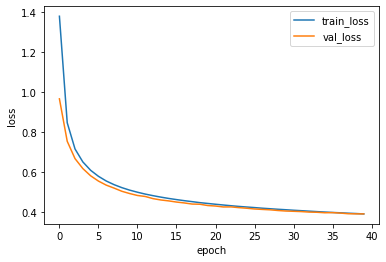

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

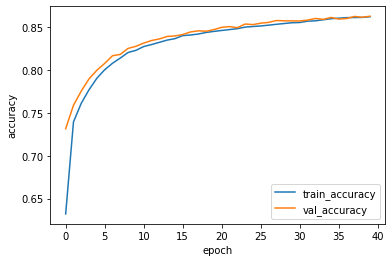

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [9]:
# 검증 세트 정확도 계산하기
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(accuracy)

0.862666666507721


이미지 데이터에 잘 맞는 모델이 아님에도 MultiClassNetwork보다 좋은 성능을 보임